# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys
api_key=api_keys.api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create url
url = "http://api.openweathermap.org/data/2.5/weather?"

units = "imperial"

query_url = f"{url}appid={api_key}&units={units}&q="

#Create list to store data about cities 
city_data = []

# Loop through all the cities in our list
for city in range(len(cities)):
        

    # city url for each city
    city_url = query_url + cities[city]
    
    #print(city_url)
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        print(f"Processing {cities[city]}")

        # Parse out the max temp, humidity, and cloudiness
        city = city_weather["name"]
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
  #add the city information to city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass  
    
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

Processing atuona
Processing hualmay
Processing rognan
Processing cherskiy
Processing okha
Processing new norfolk
Processing lorengau
Processing kaitangata
Processing salalah
Processing punta arenas
Processing albany
Processing aljezur
Processing yegorlykskaya
Processing butaritari
Processing rikitea
Processing avarua
Processing port alfred
Processing airai
Processing thompson
Processing bur gabo
City not found. Skipping...
Processing sayyan
Processing vostok
Processing meulaboh
Processing cabedelo
Processing hovd
Processing kapaa
Processing manicore
Processing ushuaia
Processing acapulco
Processing oriximina
Processing ksenyevka
City not found. Skipping...
Processing hibbing
Processing oistins
Processing bluff
Processing castro
Processing saint-philippe
Processing roald
Processing axim
Processing chuy
Processing mataura
Processing adrar
Processing arlit
Processing busselton
Processing ponta do sol
Processing tsihombe
City not found. Skipping...
Processing mahebourg
Processing qaanaaq


Processing charters towers
Processing mehamn
Processing daru
Processing ankazoabo
Processing lashio
Processing miri
Processing vila velha
Processing urumqi
City not found. Skipping...
Processing klaksvik
Processing san jose
Processing presidencia roque saenz pena
Processing altamura
Processing tachov
Processing camalu
Processing mitsamiouli
Processing douglas
Processing viligili
City not found. Skipping...
Processing sakakah
City not found. Skipping...
Processing coquimbo
Processing rawah
City not found. Skipping...
Processing tiarei
Processing hollins
Processing neuquen
Processing mikuni
Processing varzea da palma
Processing baherden
Processing kandiari
Processing queimados
Processing zhenhai
Processing nelson bay
Processing forrest city
Processing wielun
Processing saint-augustin
Processing cayenne
Processing amarante do maranhao
Processing kadom
Processing rawson
Processing el sauzal
Processing nikolskoye
Processing ribeira brava
Processing lichuan
Processing quelimane
Processing lu

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Convert into data frame 
city_df= pd.DataFrame(city_data)
city_df.to_csv(output_data_file, index=False, header=True)
city_df.head(5)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Atuona,52,PF,1557421944,77,-9.80,-139.03,83.03,14.09
1,Hualmay,82,PE,1557421944,93,-11.10,-77.61,65.75,18.01
2,Rognan,75,NO,1557421763,46,67.10,15.40,51.01,13.87
3,Cherskiy,98,RU,1557421945,92,68.75,161.30,27.59,0.40
4,Okha,100,RU,1557421945,86,53.59,142.95,30.83,7.31


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

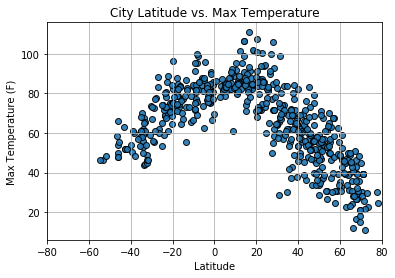

In [17]:
#plt.scatter to do graphics lat is x axis and max temp is y
plt.scatter(city_df['Lat'], city_df['Max Temp'], marker = 'o', alpha = 0.9, edgecolors="black", linewidths=1, label="Cities")
plt.xlim(-80, 80)
#build up the plot
plt.grid(True)
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

#Save and show
plt.savefig("../LatTemp1.png")
plt.show()



#### Latitude vs. Humidity Plot

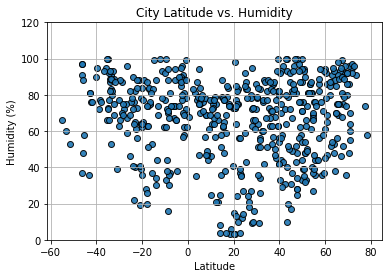

In [14]:

#plt.scatter again

plt.scatter(city_df['Lat'],city_df['Humidity'], marker = 'o', alpha = 0.9, edgecolors="black",linewidths=1, label="Cities")
plt.ylim(0, 120)
#build up plot
plt.grid(True)
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

#Save and show
plt.savefig("../LatHumid2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

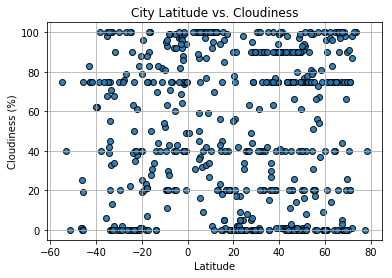

In [15]:

#plt.scatter again
plt.scatter(city_df['Lat'],city_df['Cloudiness'], marker = 'o', alpha = 0.9, edgecolors="black", linewidths=1, label="Cities")

#build up plot
plt.grid(True)
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

#Save and show
plt.savefig("../LatCloud3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

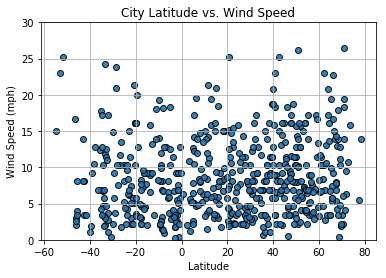

In [16]:
#plt.scatter again
plt.scatter(city_df['Lat'],city_df['Wind Speed'], marker = 'o', alpha = 0.9, edgecolors="black", linewidths=1, label="Cities")
plt.ylim(0, 30)
#build up plot
plt.grid(True)
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

#Save and show
plt.savefig("../LatWind4.png")
plt.show()

Observations

1. There is a nonlinear relationship between city latitude and maximum temperature. The relationship between latitude and maximum temperature is positive in cities south of the equator. Cities with latitutdes between 0 and -20 have the highest maximum temperatures. The maximum temperature than starts declining in cities that are north of the equator. in general, cities closest to the equator have higher maximum temperatures than cities farther away from the equator.
2. There is no linear relationship between city latitude and humidity levels. However, the scatterplot shows that for each latitude, there are cities that have low and high humidity. It's possible that maximum temperature and latitude are related while humidity and longitude are related. 
3. In addition, the relationship between cloudiness and latitude seems to be unrelated. 
4. The scatterplot on city latitutde and wind speed looks like it could also be nonlinear. It may be a very weak relationship but citites with the highest wind speeds are more likely to be further away from the equator. 

